# Karthik Venkataraman, Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

Average SAT verbal and math scores for each state and DC, along with participation rate

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete. 2 issues:

(1) Participation rate for some state is suspiciously low

(2) Data includes an "All" state, which seems to be some sort of average of all states. This needs to be removed before any statistics are computed

##### 3. Create a data dictionary for the dataset.

Dictionaries created below in steps 10 and 11

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
f = open("../assets/sat_scores.csv", 'rU')
sat_scores = csv.reader(f)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 'U' mode is deprecated
  if __name__ == '__main__':


##### 5. Print the data

In [4]:
sat_scores = list(sat_scores)
print(sat_scores)

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [5]:
labels = sat_scores[0]
sat_scores = sat_scores[1:]
len(sat_scores)

52

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [6]:
# Create new list of States, but still leave state names in header-less SAT scores list

states = []
[states.append(row[0]) for row in sat_scores]
print(states)

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All']


##### 8. Print the types of each column

In [7]:
# Assume that the data types of the elements in the first row apply to all other rows

for i in range(len(sat_scores[0])):
    print(type(sat_scores[0][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [8]:
# Convert Rate, Verbal and Math to float

for row in sat_scores:
    for i in [1,2,3]:
        row[i] = int(row[i])

# Remove state "All" for future stats calcs

sat_scores = sat_scores[:-1]
print(sat_scores, "\n")
print("Quick check: ",type(sat_scores[5][2]))

[['CT', 82, 509, 510], ['NJ', 81, 499, 513], ['MA', 79, 511, 515], ['NY', 77, 495, 505], ['NH', 72, 520, 516], ['RI', 71, 501, 499], ['PA', 71, 500, 499], ['VT', 69, 511, 506], ['ME', 69, 506, 500], ['VA', 68, 510, 501], ['DE', 67, 501, 499], ['MD', 65, 508, 510], ['NC', 65, 493, 499], ['GA', 63, 491, 489], ['IN', 60, 499, 501], ['SC', 57, 486, 488], ['DC', 56, 482, 474], ['OR', 55, 526, 526], ['FL', 54, 498, 499], ['WA', 53, 527, 527], ['TX', 53, 493, 499], ['HI', 52, 485, 515], ['AK', 51, 514, 510], ['CA', 51, 498, 517], ['AZ', 34, 523, 525], ['NV', 33, 509, 515], ['CO', 31, 539, 542], ['OH', 26, 534, 439], ['MT', 23, 539, 539], ['WV', 18, 527, 512], ['ID', 17, 543, 542], ['TN', 13, 562, 553], ['NM', 13, 551, 542], ['IL', 12, 576, 589], ['KY', 12, 550, 550], ['WY', 11, 547, 545], ['MI', 11, 561, 572], ['MN', 9, 580, 589], ['KS', 9, 577, 580], ['AL', 9, 559, 554], ['NE', 8, 562, 568], ['OK', 8, 567, 561], ['MO', 8, 577, 577], ['LA', 7, 564, 562], ['WI', 6, 584, 596], ['AR', 6, 562, 55

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [50]:
rate_dict_bystate = {}
verbal_dict_bystate = {}
math_dict_bystate = {}

for row in sat_scores:
    rate_dict_bystate[row[0]] = row[1]
    verbal_dict_bystate[row[0]] = row[2]
    math_dict_bystate[row[0]] = row[3]

print("Rate: ", rate_dict_bystate, "\n")
print("Verbal: ", verbal_dict_bystate, "\n")
print("Math: ", math_dict_bystate)

Rate:  {'KS': 9, 'TN': 13, 'MA': 79, 'WI': 6, 'NJ': 81, 'WA': 53, 'MS': 4, 'TX': 53, 'DE': 67, 'CT': 82, 'AK': 51, 'IA': 5, 'UT': 5, 'AL': 9, 'SD': 4, 'ID': 17, 'HI': 52, 'OR': 55, 'MT': 23, 'IL': 12, 'WY': 11, 'OK': 8, 'VT': 69, 'AR': 6, 'CA': 51, 'CO': 31, 'FL': 54, 'MI': 11, 'NE': 8, 'WV': 18, 'MN': 9, 'NC': 65, 'NY': 77, 'PA': 71, 'ME': 69, 'MO': 8, 'NV': 33, 'VA': 68, 'LA': 7, 'NH': 72, 'GA': 63, 'MD': 65, 'IN': 60, 'SC': 57, 'DC': 56, 'AZ': 34, 'KY': 12, 'ND': 4, 'NM': 13, 'RI': 71, 'OH': 26} 

Verbal:  {'KS': 577, 'TN': 562, 'MA': 511, 'WI': 584, 'NJ': 499, 'WA': 527, 'MS': 566, 'TX': 493, 'DE': 501, 'CT': 509, 'AK': 514, 'IA': 593, 'UT': 575, 'AL': 559, 'SD': 577, 'ID': 543, 'HI': 485, 'OR': 526, 'MT': 539, 'IL': 576, 'WY': 547, 'OK': 567, 'VT': 511, 'AR': 562, 'CA': 498, 'CO': 539, 'FL': 498, 'MI': 561, 'NE': 562, 'WV': 527, 'MN': 580, 'NC': 493, 'NY': 495, 'PA': 500, 'ME': 506, 'MO': 577, 'NV': 509, 'VA': 510, 'LA': 564, 'NH': 520, 'GA': 491, 'MD': 508, 'IN': 499, 'SC': 486, 

##### 11. Create a dictionary with the values for each of the numeric columns

In [10]:
# Assuming that the dictionary will have rate, verbal and math as keys, and the values from each state 
# as a values list

metrics_dict = {}
rate_list=[]
verbal_list=[]
math_list=[]

[rate_list.append(row[1]) for row in sat_scores]
[verbal_list.append(row[2]) for row in sat_scores]
[math_list.append(row[3]) for row in sat_scores]

metrics_dict["Rate"] = rate_list
metrics_dict["Verbal"] = verbal_list
metrics_dict["Math"] = math_list
print(metrics_dict)

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551]}


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [11]:
print("Rate... Min: {} Max: {}".format(np.min(rate_list), np.max(rate_list)))
print("Verbal... Min: {} Max: {}".format(np.min(verbal_list), np.max(verbal_list)))
print("Math... Min: {} Max: {}".format(np.min(math_list), np.max(math_list)))

Rate... Min: 4 Max: 82
Verbal... Min: 482 Max: 593
Math... Min: 439 Max: 603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [52]:
def stdev(column):
    values = metrics_dict[column]
    diff = [(x - np.mean(values))**2 for x in values]
    sd = (np.sum(diff)/len(values))**(0.5)
    return sd

print("Rate stdev: ", stdev("Rate"))
print("Verbal stdev: ", stdev("Verbal"))
print("Math stdev: ", stdev("Math"))

Rate stdev:  27.2792386761
Verbal stdev:  33.0319826842
Math stdev:  35.9298731731


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

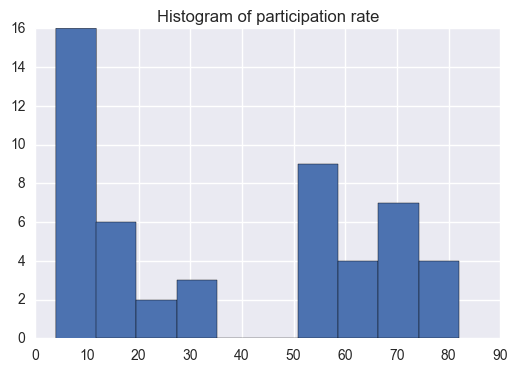

In [13]:
plt.title("Histogram of participation rate")
plt.hist(metrics_dict["Rate"])
plt.show()

##### 15. Plot the Math distribution

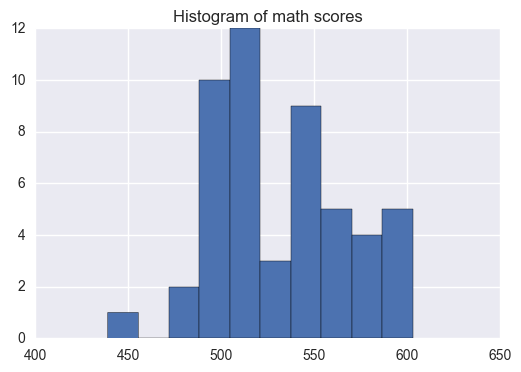

In [15]:
plt.title("Histogram of math scores")
plt.hist(metrics_dict["Math"])
plt.show()

##### 16. Plot the Verbal distribution

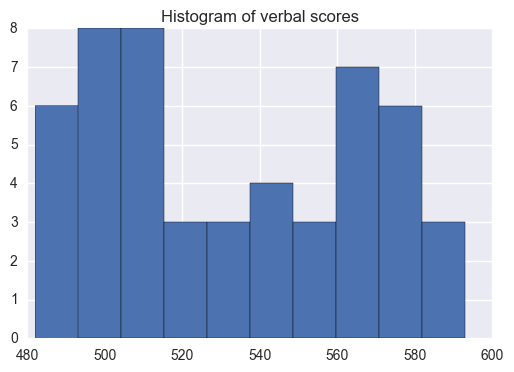

In [16]:
plt.title("Histogram of verbal scores")
plt.hist(metrics_dict["Verbal"])
plt.show()

##### 17. What is the typical assumption for data distribution?

Normally distributed

##### 18. Does that distribution hold true for our data?

No, none of the variables seem to be normally distributed

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

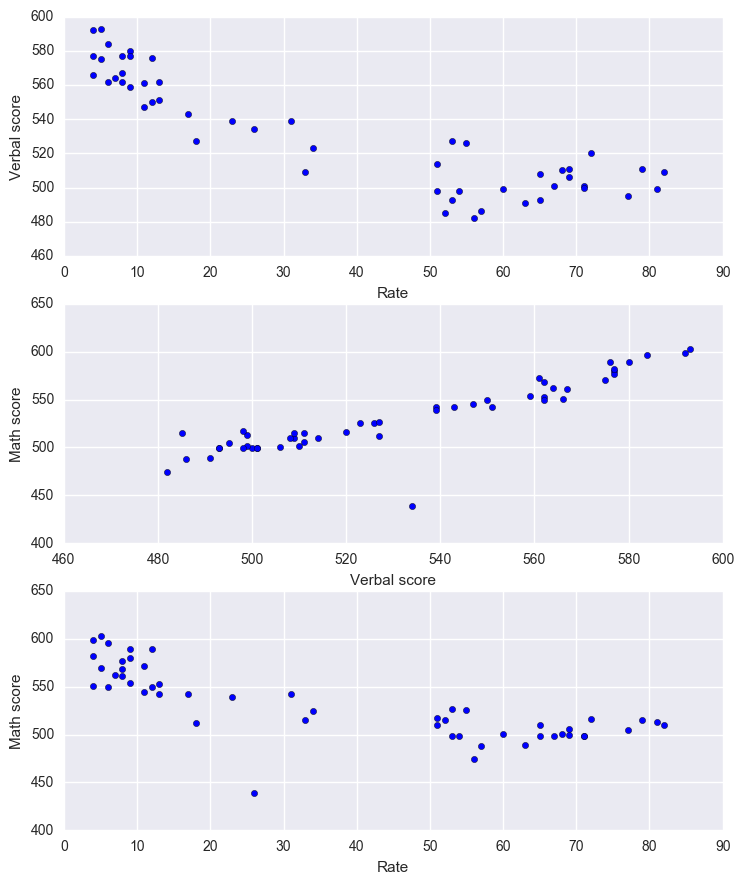

In [29]:
fig = plt.figure()
fig.set_size_inches(8.5, 10.5)

ax1 = fig.add_subplot(311)
ax1.set_xlabel("Rate")
ax1.set_ylabel("Verbal score")
ax1.scatter(rate_list, verbal_list)

ax2 = fig.add_subplot(312)
ax2.set_xlabel("Verbal score")
ax2.set_ylabel("Math score")
ax2.scatter(verbal_list, math_list)

ax3 = fig.add_subplot(313)
ax3.set_xlabel("Rate")
ax3.set_ylabel("Math score")
ax3.scatter(rate_list, math_list)

plt.show()

##### 20. Are there any interesting relationships to note?

1) Math score and verbal score are positively correlated

2) Both math score and verbal score go down with increasing participation rate, although the participation rate is suspiciously low for a number of states

##### 21. Create box plots for each variable. 

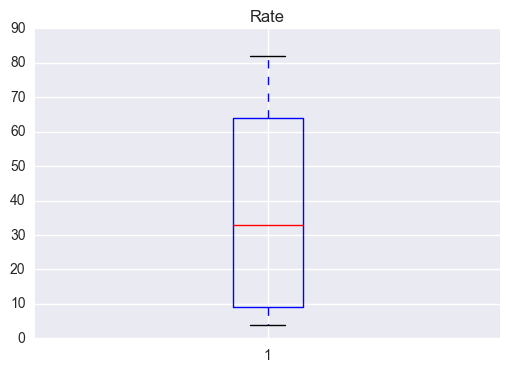

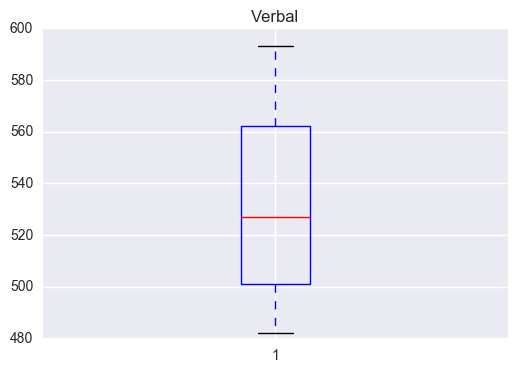

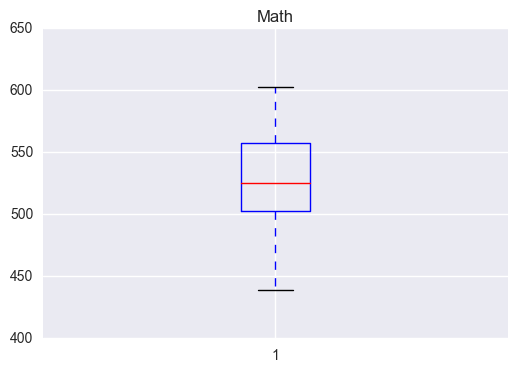

In [36]:
plt.boxplot(rate_list)
plt.title("Rate")
plt.show()
plt.boxplot(verbal_list)
plt.title("Verbal")
plt.show()
plt.boxplot(math_list)
plt.title("Math")
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

RATE HEATMAP

![title](Rate_heatmap.png)

MATH HEATMAP

![title](Math_heatmap.png)

VERBAL HEATMAP

![title](Verbal_heatmap.png)
